# Diabetes Detection Project 

In [2]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [3]:
# Loading the diabetes dataset
df = pd.read_csv("diabetes_prediction_dataset.csv")
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


### EDA (Exploratory data analysis)

In [5]:
df.shape

(100000, 9)

In [6]:
cols = df.columns.tolist()
cols

['gender',
 'age',
 'hypertension',
 'heart_disease',
 'smoking_history',
 'bmi',
 'HbA1c_level',
 'blood_glucose_level',
 'diabetes']

In [7]:
df['diabetes'].value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

In [8]:
# obtaining the no. of unique values and what they are.
for i in cols:
    print("No. of Unique Values in '{}' = {}. \n Those unique values are :- {}".format(i, df[i].nunique(), df[i].unique()))
    print("-----------------------")

No. of Unique Values in 'gender' = 3. 
 Those unique values are :- ['Female' 'Male' 'Other']
-----------------------
No. of Unique Values in 'age' = 102. 
 Those unique values are :- [80.   54.   28.   36.   76.   20.   44.   79.   42.   32.   53.   78.
 67.   15.   37.   40.    5.   69.   72.    4.   30.   45.   43.   50.
 41.   26.   34.   73.   77.   66.   29.   60.   38.    3.   57.   74.
 19.   46.   21.   59.   27.   13.   56.    2.    7.   11.    6.   55.
  9.   62.   47.   12.   68.   75.   22.   58.   18.   24.   17.   25.
  0.08 33.   16.   61.   31.    8.   49.   39.   65.   14.   70.    0.56
 48.   51.   71.    0.88 64.   63.   52.    0.16 10.   35.   23.    0.64
  1.16  1.64  0.72  1.88  1.32  0.8   1.24  1.    1.8   0.48  1.56  1.08
  0.24  1.4   0.4   0.32  1.72  1.48]
-----------------------
No. of Unique Values in 'hypertension' = 2. 
 Those unique values are :- [0 1]
-----------------------
No. of Unique Values in 'heart_disease' = 2. 
 Those unique values are :- [1 0

In [9]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


<Axes: >

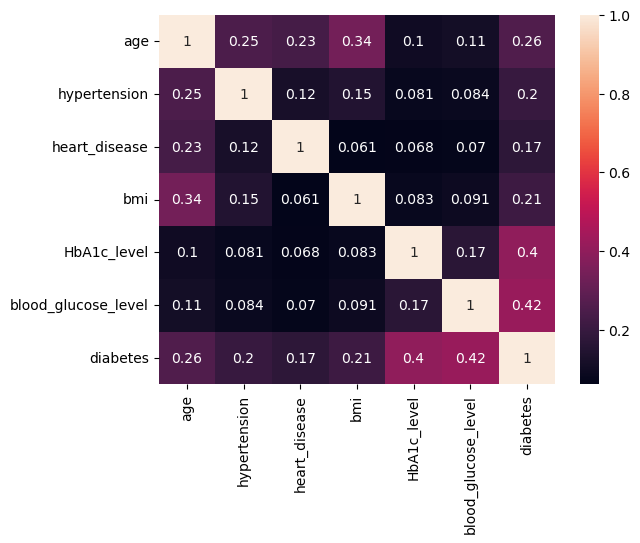

In [10]:
sns.heatmap(data=df.select_dtypes(include=['int64','float64']).corr(), annot=True)

In [11]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [12]:
df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [13]:
df['gender'].value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

In [14]:
# Observing the male & female patients got diabetes
gender_diabetic = pd.pivot_table(data=df, index='gender', values='diabetes', aggfunc='sum')
gender_diabetic

,diabetes
gender,
Female,4461
Male,4039
Other,0


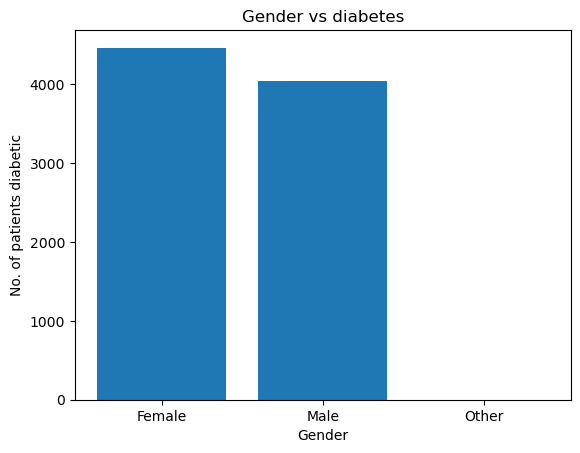

In [15]:
# Vizualizing the no. of diabetic patients in each gender type
plt.bar(gender_diabetic.index, gender_diabetic['diabetes'].values)
plt.title("Gender vs diabetes")
plt.xlabel('Gender')
plt.ylabel('No. of patients diabetic')
plt.show()

##### Females are bit more diabetic than male.
##### Other gender category patients are not diabetic 

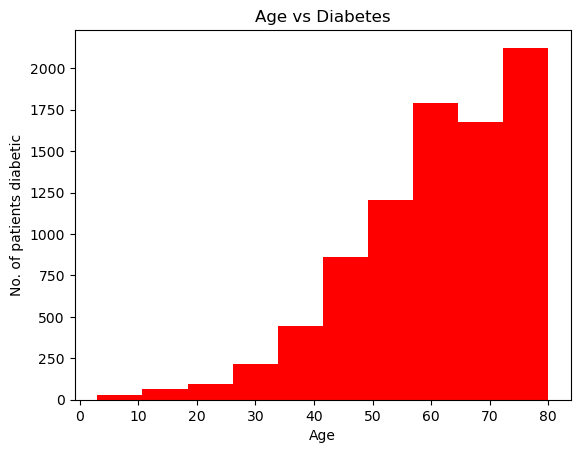

In [17]:
# Vizualizing age ranges vs diabetic patients
plt.hist(df['age'][df['diabetes']==1], color='red')
plt.title("Age vs Diabetes")
plt.xlabel("Age")
plt.ylabel("No. of patients diabetic")
plt.show()

##### above 50 age group patients are more tendency to have diabetes

In [19]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [20]:
# Change some Numerical variable values into categories
Hypertension_dict = {1:"Yes", 0:"No"}
Heart_disease_dict = {1:"Yes", 0:"No"}
Diabetes_dict = {1:"Yes", 0:"No"}

# for Analysis purpose use temporary df 
temp_df = df
temp_df = temp_df.replace({'hypertension':Hypertension_dict, 
                           'heart_disease':Heart_disease_dict, 
                           'diabetes':Diabetes_dict})
temp_df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,No,Yes,never,25.19,6.6,140,No
1,Female,54.0,No,No,No Info,27.32,6.6,80,No
2,Male,28.0,No,No,never,27.32,5.7,158,No
3,Female,36.0,No,No,current,23.45,5.0,155,No
4,Male,76.0,Yes,Yes,current,20.14,4.8,155,No


In [21]:
hypertension_diabetes = pd.crosstab(temp_df['hypertension'], temp_df['diabetes'])
hypertension_diabetes

diabetes,No,Yes
hypertension,,
No,86103,6412
Yes,5397,2088


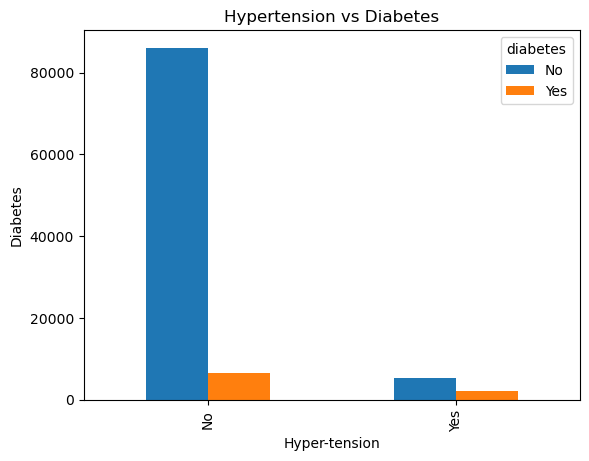

In [22]:
# Vizualizing Hypertension vs Diabetes
hypertension_diabetes.plot(kind="bar")
plt.title("Hypertension vs Diabetes")
plt.xlabel("Hyper-tension")
plt.ylabel("Diabetes")
plt.show()

##### so Hypertension not plays a significant role in diabetes prediction.
##### because no. of patients with hypertension & diabetes are very low.

In [24]:
heart_disease_diabetes = pd.crosstab(temp_df['heart_disease'], temp_df['diabetes'])
heart_disease_diabetes

diabetes,No,Yes
heart_disease,,
No,88825,7233
Yes,2675,1267


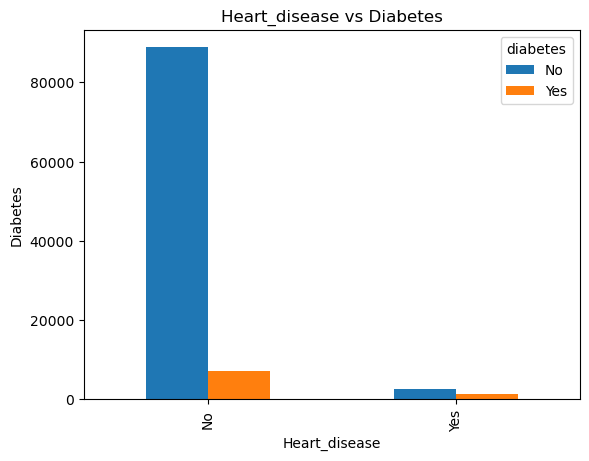

In [25]:
# Vizualizing Heart_disease vs Diabetes
heart_disease_diabetes.plot(kind="bar")
plt.title("Heart_disease vs Diabetes")
plt.xlabel("Heart_disease")
plt.ylabel("Diabetes")
plt.show()

##### so Heart_disease not plays a significant role in diabetes prediction.
##### because no. of patients with heart_disease & diabetes are very low.

In [27]:
smoking_diabetes =  pd.crosstab(temp_df['smoking_history'], temp_df['diabetes'])
smoking_diabetes

diabetes,No,Yes
smoking_history,,
No Info,34362,1454
current,8338,948
ever,3532,472
former,7762,1590
never,31749,3346
not current,5757,690


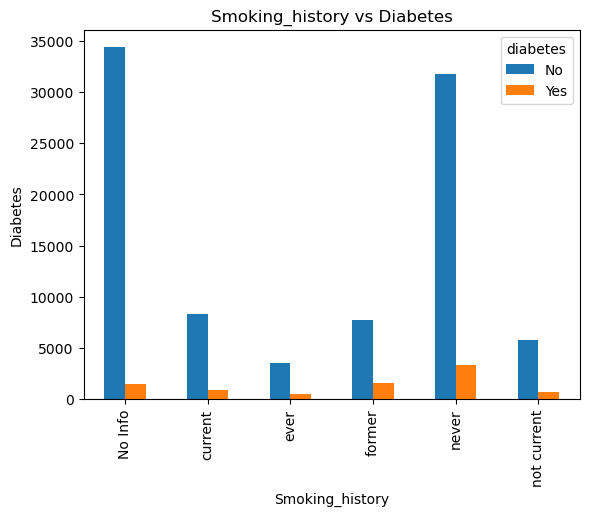

In [28]:
# Vizualizing smoking_history vs Diabetes
smoking_diabetes.plot(kind="bar")
plt.title("Smoking_history vs Diabetes")
plt.xlabel("Smoking_history")
plt.ylabel("Diabetes")
plt.show()

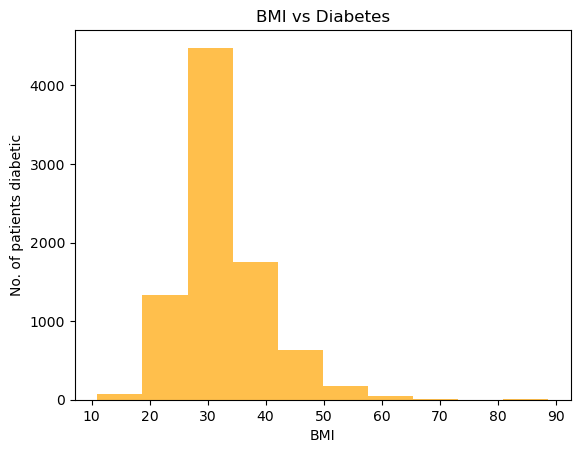

In [29]:
# Vizualizing bmi vs Diabetes
plt.hist(temp_df['bmi'][df['diabetes']==1], color='orange',alpha=0.7)
plt.title("BMI vs Diabetes")
plt.xlabel("BMI")
plt.ylabel("No. of patients diabetic")
plt.show()

##### The patients with bmi of range b/w 20 to 50 are having the diabetes

In [31]:
HbA1c_diabetes = {}
for i in temp_df['diabetes'].unique():
    HbA1c_diabetes[i] = temp_df[temp_df['diabetes']==i]['HbA1c_level']

HbA1c_diabetes

{'No': 0        6.6
 1        6.6
 2        5.7
 3        5.0
 4        4.8
         ... 
 99995    6.2
 99996    6.5
 99997    5.7
 99998    4.0
 99999    6.6
 Name: HbA1c_level, Length: 91500, dtype: float64,
 'Yes': 6        6.5
 26       6.5
 38       5.7
 40       9.0
 53       7.0
         ... 
 99935    8.2
 99938    6.2
 99957    6.5
 99962    7.0
 99979    6.2
 Name: HbA1c_level, Length: 8500, dtype: float64}

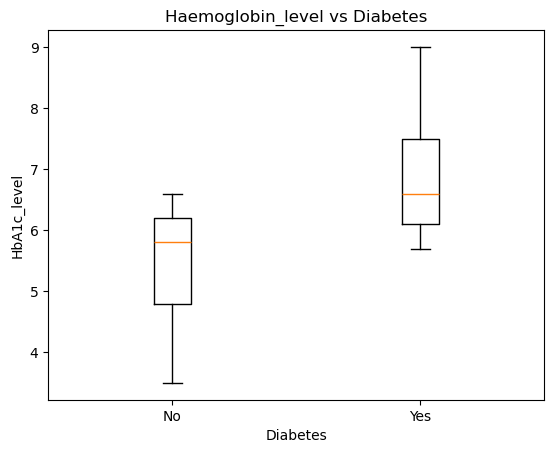

In [32]:
# Vizualizing HbA1c_level vs Diabetes
plt.boxplot(HbA1c_diabetes.values(), labels=HbA1c_diabetes.keys())
plt.title("Haemoglobin_level vs Diabetes")
plt.xlabel("Diabetes")
plt.ylabel("HbA1c_level")
plt.show()

##### Higher the HbA1c_level , Higher the tendency of having diabetes

In [34]:
blood_glucose_level_diabetes = {}
for i in temp_df['diabetes'].unique():
    blood_glucose_level_diabetes[i] = temp_df[temp_df['diabetes']==i]['blood_glucose_level']

blood_glucose_level_diabetes

{'No': 0        140
 1         80
 2        158
 3        155
 4        155
         ... 
 99995     90
 99996    100
 99997    155
 99998    100
 99999     90
 Name: blood_glucose_level, Length: 91500, dtype: int64,
 'Yes': 6        200
 26       200
 38       260
 40       160
 53       159
         ... 
 99935    140
 99938    300
 99957    280
 99962    200
 99979    240
 Name: blood_glucose_level, Length: 8500, dtype: int64}

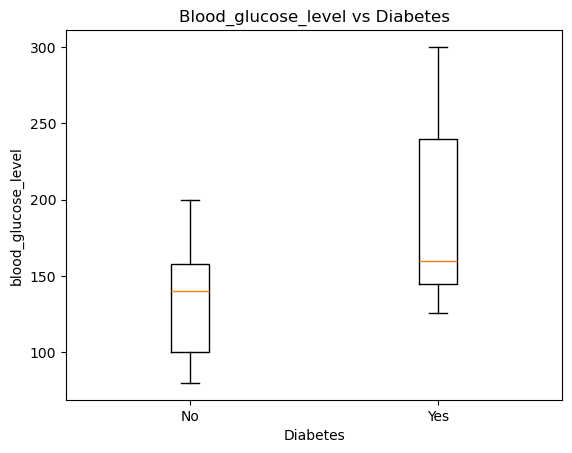

In [35]:
# Vizualizing blood_glucose_level vs Diabetes
plt.boxplot(blood_glucose_level_diabetes.values(), labels=blood_glucose_level_diabetes.keys())
plt.title("Blood_glucose_level vs Diabetes")
plt.xlabel("Diabetes")
plt.ylabel("blood_glucose_level")
plt.show()

##### Here also higher the blood_glucose_level, higher the tendency of having diabetes 

In [37]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


### splitting into Target and Independent features

In [39]:
X = df.drop('diabetes', axis=1)
y = df['diabetes']

In [40]:
# Since I Identified the 'hypertension', 'heart_disease' not influences the diabetes. so, i am dropping them
X = X.drop(['hypertension','heart_disease'], axis=1)
X.columns

Index(['gender', 'age', 'smoking_history', 'bmi', 'HbA1c_level',
       'blood_glucose_level'],
      dtype='object')

In [41]:
X.dtypes

gender                  object
age                    float64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
dtype: object

### Splitting into Train-Test Splits

In [126]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(80000, 6) (20000, 6) (80000,) (20000,)


In [128]:
X_train.to_csv("X_train_diabetes_to_preprocess.csv",index=False)

### Encoding Categorical variables

In [90]:
# using OneHotEncoder
cat_cols = X_train.select_dtypes(include=["object"]).columns.tolist()

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False, drop="first", dtype="int64", handle_unknown="ignore")

train_encoded = ohe.fit_transform(X_train[cat_cols])
test_encoded = ohe.transform(X_test[cat_cols])

X_train_encoded = pd.DataFrame(train_encoded, columns=ohe.get_feature_names_out())
X_test_encoded = pd.DataFrame(test_encoded, columns=ohe.get_feature_names_out())
X_train_encoded.head()

,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,1,0,0,0,1,0,0
1,1,0,0,0,0,1,0
2,0,0,0,1,0,0,0
3,0,0,0,0,0,0,1
4,0,0,1,0,0,0,0


### Scaling Continuous variables

In [92]:
# using MinMaxScaler
num_cols = X_train.select_dtypes(include=["int64","float64"]).columns.tolist()

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))

train_scaled = sc.fit_transform(X_train[num_cols])
test_scaled = sc.transform(X_test[num_cols])

X_train_scaled = pd.DataFrame(train_scaled, columns=sc.get_feature_names_out())
X_test_scaled = pd.DataFrame(test_scaled, columns=sc.get_feature_names_out())
X_train_scaled.head()

,age,bmi,HbA1c_level,blood_glucose_level
0,0.912412,0.180418,0.000000,0.000000
1,1.000000,0.178340,0.400000,0.295455
2,0.474474,0.175040,0.090909,0.354545
3,0.324324,0.108300,0.272727,0.090909
4,0.762262,0.147904,0.181818,0.022727


In [94]:
X_train = pd.concat([X_train_scaled, X_train_encoded], axis=1)
X_test = pd.concat([X_test_scaled, X_test_encoded], axis=1)
X_train.head()

,age,bmi,HbA1c_level,blood_glucose_level,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,0.912412,0.180418,0.000000,0.000000,1,0,0,0,1,0,0
1,1.000000,0.178340,0.400000,0.295455,1,0,0,0,0,1,0
2,0.474474,0.175040,0.090909,0.354545,0,0,0,1,0,0,0
3,0.324324,0.108300,0.272727,0.090909,0,0,0,0,0,0,1
4,0.762262,0.147904,0.181818,0.022727,0,0,1,0,0,0,0


### Model/Estimator selection 

In [96]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [98]:
y_preds = rf_model.predict(X_test)
y_preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Model Evaluation

In [106]:
y_train_preds = rf_model.predict(X_train)
train_score = accuracy_score(y_train, y_train_preds)
print("Train-Accuracy of the Random-Forest model = ",train_score*100,"%")

Train-Accuracy of the Random-Forest model =  99.885 %


In [104]:
# Model scoring
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
score = accuracy_score(y_test, y_preds)
print("Accuracy of the default Random-Forest model = ",score*100,"%")

Accuracy of the default Random-Forest model =  97.015 %


In [108]:
confusion_matrix(y_test, y_preds)

array([[18220,    72],
       [  525,  1183]], dtype=int64)

#### HyperParameter tuning

In [110]:
param_grid = {
    "n_estimators":[80,100,200],
    "max_depth":[3,4,5],
    "min_samples_leaf":[2,4],
    "max_features":[0.4,0.5,0.6],
}

In [114]:
# Using GridSearchCV for tuning the model
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rf_hyp_model = RandomForestClassifier(random_state=42)
clf = GridSearchCV(rf_hyp_model, param_grid, cv=3)
clf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [3, 4, 5],
                         'max_features': [0.4, 0.5, 0.6],
                         'min_samples_leaf': [2, 4],
                         'n_estimators': [80, 100, 200]})

In [116]:
clf.best_estimator_

RandomForestClassifier(max_depth=3, max_features=0.4, min_samples_leaf=2,
                       n_estimators=80, random_state=42)

In [118]:
clf.best_score_

0.9717999938973613

In [120]:
Rf_tuned = clf.best_estimator_
tuned_preds = Rf_tuned.predict(X_test)
tuned_preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [122]:
# Tuned Model scoring
from sklearn.metrics import accuracy_score
tuned_score = accuracy_score(tuned_preds, y_test)
print("Accuracy of the Tuned Random-Forest model = ",tuned_score*100,"%")

Accuracy of the Tuned Random-Forest model =  97.21499999999999 %


### Model pickling

In [124]:
# dumping the Rf_tuned model into pickle file
import pickle as pk
my_diabetes_model = open("My_final_diabetes_RF_model.pickle","wb")
pk.dump(Rf_tuned, my_diabetes_model)
my_diabetes_model.close()

### Model Testing

In [130]:
# Load the model from the pickle file
import pandas as pd
import pickle as pk
pickle_file_load = open("My_final_diabetes_RF_model.pickle",'rb')
Test_Model = pk.load(pickle_file_load)

In [132]:
Test_Model

RandomForestClassifier(max_depth=3, max_features=0.4, min_samples_leaf=2,
                       n_estimators=80, random_state=42)

In [134]:
train_df = pd.read_csv("X_train_diabetes_to_preprocess.csv")
train_df.head()

,gender,age,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,Male,73.0,former,24.77,3.5,80
1,Male,80.0,never,24.60,5.7,145
2,Female,38.0,ever,24.33,4.0,158
3,Female,26.0,not current,18.87,5.0,100
4,Female,61.0,current,22.11,4.5,85


In [203]:
new_data = {"gender":["Female"], "age":[58], "smoking_history":["never"], "bmi":[43.6],
            "HbA1c_level":[8.6], "blood_glucose_level":[300]}
new_df = pd.DataFrame(new_data)
new_df

,gender,age,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,Female,58,never,43.6,8.6,300


In [205]:
## Preprocess new data
# scaling
new_df[num_cols] = sc.transform(new_df[num_cols])

# encoding
encoded = ohe.transform(new_df[cat_cols])
encoded_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out())
new_df = pd.concat([new_df[num_cols], encoded_df], axis=1)

new_df.head()

,age,bmi,HbA1c_level,blood_glucose_level,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,0.724725,0.410586,0.927273,1.0,0,0,0,0,0,1,0


In [207]:
### Function to test Diabetes
def detect_diabetes(data):
    if(Test_Model.predict(data)==1):
        print("The Patient is Diabetic.")
    else:
        print("The Patient is not Diabetic.")

In [209]:
# check the new/unseen data using detect_diabetes
detect_diabetes(new_df)

The Patient is Diabetic.
